<a href="https://colab.research.google.com/github/kbm1959/jupyter/blob/main/neuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Class Definition
In essence, this code defines a simple neural network capable of learning patterns from data and making predictions. The train method adjusts the network's weights to improve its accuracy, while the query method uses the trained network to classify new data. The backquery method provides a way to explore the internal representations learned by the network.

In [ ]:
import numpy
# import scypi.special for the sigmoid function expit()
import scipy.special
# library for plotting arrays
import matplotlib.pyplot
# ensure the plots are inside the notebook
%matplotlib inline

# neural network class definition
class neuralNetwork:

    #initialize the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden and output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes

        # learning rate
        self.lr = learningrate

        # link weight matrices wih and who
        # weights inside the rray are w_i_j
        # where link is from node i to node j in the next layer
        # w11 w21 ...
        # w12 w22 ...
        # ...
        # self.wih = (numpy.random.rand(self.hnodes, self.inodes) - 0.5)
        # self.who = (numpy.random.rand(self.onodes, self.hnodes) - 0.5)
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))

        # activation function ist the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        self.inverse_activation_function = lambda x: scipy.special.logit(x)
        pass


    #train the neural network
    def train(self, inputs_list, targets_list):
        # convert list parameters to 2d arrays
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T

        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signal emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from the final output layer
        final_outputs = self.activation_function(final_inputs)

        # error is (target - actual)
        output_errors = targets - final_outputs

        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors)

        # update the weights for the links between the hidden and the output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1 - final_outputs)), numpy.transpose(hidden_outputs))
        # update the weights for the links between the input and the hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1 - hidden_outputs)), numpy.transpose(inputs))

        pass

    #query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T

        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signal emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from the final output layer
        final_outputs = self.activation_function(final_inputs)

        return final_outputs

    # backquery the neural network
    # we'll use the same termnimology to each item,
    # eg target are the values at the right of the network, albeit used as input
    # eg hidden_output is the signal to the right of the middle nodes
    def backquery(self, targets_list):
        # transpose the targets list to a vertical array
        final_outputs = numpy.array(targets_list, ndmin=2).T

        # calculate the signal into the final output layer
        final_inputs = self.inverse_activation_function(final_outputs)

        # calculate the signal out of the hidden layer
        hidden_outputs = numpy.dot(self.who.T, final_inputs)
        # scale them back to 0.01 to .99
        hidden_outputs -= numpy.min(hidden_outputs)
        hidden_outputs /= numpy.max(hidden_outputs)
        hidden_outputs *= 0.98
        hidden_outputs += 0.01

        # calculate the signal into the hidden layer
        hidden_inputs = self.inverse_activation_function(hidden_outputs)

        # calculate the signal out of the input layer
        inputs = numpy.dot(self.wih.T, hidden_inputs)
        # scale them back to 0.01 to .99
        inputs -= numpy.min(inputs)
        inputs /= numpy.max(inputs)
        inputs *= 0.98
        inputs += 0.01

        return inputs


# Mount Google Drive

In [ ]:
# mount drive to access data files
from google.colab import drive
drive.mount('./mount')

Mounted at ./mount


# Train the neural network
Define the dimensions of the network,
load training data from google drive and
set training parameters:
- learning rate
- number of epochs

then train the network.

In [ ]:
%%time
# train the neural network
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# learning_rate is 0.3
learning_rate = 0.02

# create instance of neuralNetwork
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# load the training data
training_data_file = open("mount/My Drive/Colab Notebooks/neuralnetworks/mnist_data/mnist_train.csv",'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# epochs is the number of times the training data is used for training
epochs = 5

for e in range(epochs):
    # go through all records in the training data list
    for record in training_data_list:
        # split the records by the commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255 * 0.99) + 0.01
        #create the target output values
        targets = numpy.zeros(output_nodes) + 0.01
        # create the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)

        ## create rotated variations
        # rotated anticlockwise by 10 degrees
        inputs_plus10_img = scipy.ndimage.rotate(inputs.reshape(28,28), 10, cval=0.01, order=1, reshape=False)
        n.train(inputs_plus10_img.reshape(784), targets)
        # rotated clockwise by 10 degrees
        inputs_minus10_img = scipy.ndimage.rotate(inputs.reshape(28,28), -10, cval=0.01, order=1, reshape=False)
        n.train(inputs_minus10_img.reshape(784), targets)

        pass
    pass

CPU times: user 10min 9s, sys: 8min 15s, total: 18min 25s
Wall time: 11min 3s


# Load test data

In [ ]:
# load the test data
test_data_file = open("mount/My Drive/Colab Notebooks/neuralnetworks/mnist_data/mnist_test.csv",'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

## Test the neural network

In [ ]:
# scorecard for how well the network performes, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ','
    all_values = record.split(',')
    # correct answer ist first value
    correct_label = int(all_values[0])
#    print('correct label: ',correct_label)
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:])/ 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the indes of the highest value corresponds to the label
    label = numpy.argmax(outputs)
#    print("network's answer: ", label)
    # append correct or incorrect to list
    if (label == correct_label):
        # networks answer matches correct label, add 1 to scorecard
        scorecard.append(1)
    else:
        # networks answer doesn't match the correct answer, add 0 to scorecard
        scorecard.append(0)
        pass

    pass

# calcuate the performance score
scorecard_array = numpy.asarray(scorecard)
print("performance: ", scorecard_array.sum() / scorecard_array.size * 100," %")

performance:  96.88  %


# Helper Functions
define some helper functions for analyzing individual results

In [ ]:
def show_n(img, size = 0.5):
    matplotlib.pyplot.figure(figsize=(size,size))
    matplotlib.pyplot.imshow(img, cmap='Greys', interpolation='None')
    matplotlib.pyplot.show()

In [ ]:
def show_number(n, dlist):

    all_values = dlist[n].split(',')
    print(all_values[0])
    image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
    show_n(image_array)
pass

4


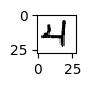

array([[0.00730128],
       [0.00168518],
       [0.00923008],
       [0.0013509 ],
       [0.98498567],
       [0.00746601],
       [0.00643579],
       [0.00471284],
       [0.00213826],
       [0.03733636]])

In [ ]:
i = 103
all_values = test_data_list[i].split(',')
show_number(i, test_data_list)
n.query((numpy.asfarray(all_values[1:]) / 255 * 0.99) + 0.01)

# Evaluate own test data
define some helper fundtions

In [ ]:
#import imageio
import imageio.v2 as imageio #(v3 also exists!)

In [ ]:
# compute the center of mass of a grayscale image
# imput is an image array
def center_of(grey_scale_img):
    mass = 0
    xs = 0
    ys = 0
    for i in range(len(grey_scale_img)):
        for j in range(len(grey_scale_img[0])):
            if grey_scale_img[i][j] != 0:
                m = grey_scale_img[i][j]
                mass += m
                xs += m * j
                ys += m * i
    return [int(xs/mass),int(ys/mass)]


In [ ]:
def show_n(img, size = 0.5):
    matplotlib.pyplot.figure(figsize=(size,size))
    matplotlib.pyplot.imshow(img, cmap='Greys', interpolation='None')
    matplotlib.pyplot.show()

In [ ]:
def shift_vert(img, n = 1):
    l = len(img)
    zeros = numpy.zeros((abs(n),l),dtype='int')
    if n >= 0:
        return numpy.append(img[n:], zeros, axis=0)
    else :
        return numpy.append(zeros, img[:n], axis=0)

In [ ]:
def shift_hor(img, n = 1):
    return shift_vert(img.T, -n).T

In [ ]:
def center_img(img, xs = 13, ys = 14):
    center = center_of(img)
    dx = xs - center[0]
    dy = center[1] - ys
    c_img = shift_hor(img, dx)
    c_img = shift_vert(c_img, dy)
    return c_img

# Single Test
enter a path to a single 28x28 image and feed it to the neural network

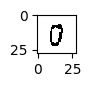

the number is:  9
the center is:  [13, 14]
[[3.07260530e-01]
 [8.00944445e-03]
 [5.22823981e-03]
 [1.93764128e-04]
 [5.51392380e-03]
 [8.00074051e-02]
 [6.52283630e-02]
 [1.29762618e-02]
 [7.01983221e-03]
 [3.28920515e-01]]


In [ ]:
number = 255 - (imageio.imread("mount/My Drive/Colab Notebooks/MNIST_Data/Hannah/thumbs/0-n.png", mode='L'))
number = center_img(number)
show_n(number)
np_number = (numpy.asfarray(number).reshape(1,28*28)) / 255 * 0.99 + 0.01
result = n.query(np_number)
label = numpy.argmax(result)
print('the number is: ',label)
print('the center is: ',center_of(number))
print(result)

# Analyze images in directory

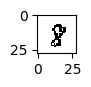

the number is:  8


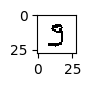

the number is:  9


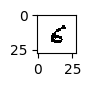

the number is:  2


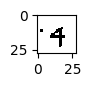

the number is:  3


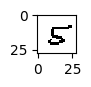

the number is:  5


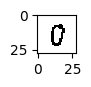

the number is:  0


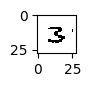

the number is:  3


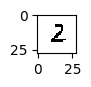

the number is:  2


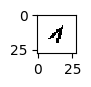

the number is:  4


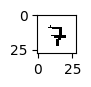

the number is:  7
performance:  70.0  %


In [ ]:
from pathlib import Path
scorecard = []
for file in Path("mount/My Drive/Colab Notebooks/MNIST_Data/Hannah/thumbs").iterdir():
    if not file.is_file():
        continue
    if str(file).lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
        number = center_img(255 - imageio.imread(file, mode='L'), 14, 14)
#        number = 255 - imageio.imread(file, mode='L')
        correct_label = int(Path(file).stem[0])
        np_number = (numpy.asfarray(number).reshape(1,28*28)) / 255 * 0.99 + 0.01
        result = n.query(np_number)
        label = numpy.argmax(result)
        # append correct or incorrect to list
        if (label == correct_label):
            # networks answer matches correct label, add 1 to scorecard
            scorecard.append(1)
        else:
            # networks answer doesn't match the correct answer, add 0 to scorecard
            scorecard.append(0)
        show_n(number)
        print('the number is: ',label)

print("performance: ", sum(scorecard) / len(scorecard) * 100," %")


# Backward analysis of the neural network

[0.01 0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


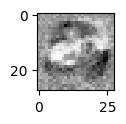

In [ ]:
# run the network backwards, given a label, see what image it produces

# label to test
label = 2
# create the output signals for this label
targets = numpy.zeros(output_nodes) + 0.01
# all_values[0] is the target label for this record
targets[label] = 0.99
print(targets)

# get image data
image_data = n.backquery(targets)

# plot image data
#matplotlib.pyplot.imshow(image_data.reshape(28,28), cmap='Greys', interpolation='None')
show_n(image_data.reshape(28,28),size=1)